In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)

seed 3


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


4 1 2


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:268: DeprecationWarning: WARN: Function `env.seed(seed)` is marked as deprecated and will be removed in the future. Please use `env.reset(seed=seed)` instead.
  deprecation(


In [3]:
# from sac import SAC
# agent = SAC(env.observation_space.shape[0], env.action_space)
# agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

In [4]:
# データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

offline_data[1].sum() tensor(2045.2968)
(100, 2)


In [6]:
# import importlib
# importlib.reload(vi_base)
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":None,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
    }

vi = vi_base.baseVI(args_init_dict)
# print(np.random.randn())

dec: h_dim 64


In [7]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()


train_vae: enc_dec
train: iter 0  trainloss 113522.55601  validloss 143892.41613±0.00000  bestvalidloss 143892.41613  last_update 0
train: iter 1  trainloss 31330.23639  validloss 14649.43673±0.00000  bestvalidloss 14649.43673  last_update 0
train: iter 2  trainloss 1847.21850  validloss 8632.87393±0.00000  bestvalidloss 8632.87393  last_update 0
train: iter 3  trainloss 2247.37085  validloss 1304.73202±0.00000  bestvalidloss 1304.73202  last_update 0
train: iter 4  trainloss 1054.67973  validloss 1213.58877±0.00000  bestvalidloss 1213.58877  last_update 0
train: iter 5  trainloss 902.64808  validloss 1049.15751±0.00000  bestvalidloss 1049.15751  last_update 0
train: iter 6  trainloss 814.79386  validloss 990.97498±0.00000  bestvalidloss 990.97498  last_update 0
train: iter 7  trainloss 763.01707  validloss 929.21352±0.00000  bestvalidloss 929.21352  last_update 0
train: iter 8  trainloss 724.43533  validloss 913.24624±0.00000  bestvalidloss 913.24624  last_update 0
train: iter 9  trai

train: iter 77  trainloss -526.92172  validloss -392.43672±0.00000  bestvalidloss -574.85494  last_update 3
train: iter 78  trainloss -481.02459  validloss -476.64849±0.00000  bestvalidloss -574.85494  last_update 4
train: iter 79  trainloss -480.65699  validloss -524.05471±0.00000  bestvalidloss -574.85494  last_update 5
train: iter 80  trainloss -534.19246  validloss -520.10402±0.00000  bestvalidloss -574.85494  last_update 6
train: iter 81  trainloss -523.57766  validloss -580.69927±0.00000  bestvalidloss -580.69927  last_update 0
train: iter 82  trainloss -522.06410  validloss -443.13655±0.00000  bestvalidloss -580.69927  last_update 1
train: iter 83  trainloss -575.81715  validloss -580.55641±0.00000  bestvalidloss -580.69927  last_update 2
train: iter 84  trainloss -577.10173  validloss -600.71945±0.00000  bestvalidloss -600.71945  last_update 0
train: iter 85  trainloss -567.73551  validloss -544.94814±0.00000  bestvalidloss -600.71945  last_update 1
train: iter 86  trainloss -6

train: iter 153  trainloss -865.13499  validloss -808.09555±0.00000  bestvalidloss -898.58594  last_update 5
train: iter 154  trainloss -830.64957  validloss -958.61745±0.00000  bestvalidloss -958.61745  last_update 0
train: iter 155  trainloss -715.25670  validloss -792.75645±0.00000  bestvalidloss -958.61745  last_update 1
train: iter 156  trainloss -887.78640  validloss -920.63229±0.00000  bestvalidloss -958.61745  last_update 2
train: iter 157  trainloss -898.88458  validloss -1014.71410±0.00000  bestvalidloss -1014.71410  last_update 0
train: iter 158  trainloss -755.96653  validloss -849.00810±0.00000  bestvalidloss -1014.71410  last_update 1
train: iter 159  trainloss -749.62258  validloss -669.89983±0.00000  bestvalidloss -1014.71410  last_update 2
train: iter 160  trainloss -783.03880  validloss -838.08035±0.00000  bestvalidloss -1014.71410  last_update 3
train: iter 161  trainloss -744.78457  validloss -788.50943±0.00000  bestvalidloss -1014.71410  last_update 4
train: iter 1

train: iter 228  trainloss -1008.00082  validloss -862.85973±0.00000  bestvalidloss -1202.06586  last_update 3
train: iter 229  trainloss -1115.08493  validloss -1123.98249±0.00000  bestvalidloss -1202.06586  last_update 4
train: iter 230  trainloss -1048.97427  validloss -1076.66908±0.00000  bestvalidloss -1202.06586  last_update 5
train: iter 231  trainloss -1034.50217  validloss -1031.86526±0.00000  bestvalidloss -1202.06586  last_update 6
train: iter 232  trainloss -1138.27797  validloss -1182.85042±0.00000  bestvalidloss -1202.06586  last_update 7
train: iter 233  trainloss -1111.51888  validloss -1243.61586±0.00000  bestvalidloss -1243.61586  last_update 0
train: iter 234  trainloss -1049.74680  validloss -1232.50574±0.00000  bestvalidloss -1243.61586  last_update 1
train: iter 235  trainloss -945.68738  validloss -822.90735±0.00000  bestvalidloss -1243.61586  last_update 2
train: iter 236  trainloss -1086.74283  validloss -1165.43701±0.00000  bestvalidloss -1243.61586  last_upda

train: iter 302  trainloss -1215.17852  validloss -1271.84320±0.00000  bestvalidloss -1307.98776  last_update 7
train: iter 303  trainloss -1030.29071  validloss -1301.69517±0.00000  bestvalidloss -1307.98776  last_update 8
train: iter 304  trainloss -1220.65766  validloss -1278.61556±0.00000  bestvalidloss -1307.98776  last_update 9
train: iter 305  trainloss -1185.52255  validloss -1332.94366±0.00000  bestvalidloss -1332.94366  last_update 0
train: iter 306  trainloss -1039.76170  validloss -1252.97495±0.00000  bestvalidloss -1332.94366  last_update 1
train: iter 307  trainloss -1185.48412  validloss -1307.26214±0.00000  bestvalidloss -1332.94366  last_update 2
train: iter 308  trainloss -1201.03962  validloss -1343.34011±0.00000  bestvalidloss -1343.34011  last_update 0
train: iter 309  trainloss -1180.32177  validloss -1251.95608±0.00000  bestvalidloss -1343.34011  last_update 1
train: iter 310  trainloss -1092.28162  validloss -1253.33223±0.00000  bestvalidloss -1343.34011  last_u

train: iter 375  trainloss -1309.67616  validloss -1352.72422±0.00000  bestvalidloss -1425.25679  last_update 1
train: iter 376  trainloss -1167.35248  validloss -1429.07184±0.00000  bestvalidloss -1429.07184  last_update 0
train: iter 377  trainloss -1056.73863  validloss -897.30530±0.00000  bestvalidloss -1429.07184  last_update 1
train: iter 378  trainloss -952.32247  validloss -1087.83738±0.00000  bestvalidloss -1429.07184  last_update 2
train: iter 379  trainloss -1150.32927  validloss -1270.36426±0.00000  bestvalidloss -1429.07184  last_update 3
train: iter 380  trainloss -1149.15733  validloss -1150.01053±0.00000  bestvalidloss -1429.07184  last_update 4
train: iter 381  trainloss -1274.24087  validloss -1291.20472±0.00000  bestvalidloss -1429.07184  last_update 5
train: iter 382  trainloss -1321.47423  validloss -1427.76474±0.00000  bestvalidloss -1429.07184  last_update 6
train: iter 383  trainloss -1156.01778  validloss -1151.60936±0.00000  bestvalidloss -1429.07184  last_upd

train: iter 448  trainloss -1282.80399  validloss -1503.10193±0.00000  bestvalidloss -1503.10193  last_update 0
train: iter 449  trainloss -1348.24128  validloss -1378.22310±0.00000  bestvalidloss -1503.10193  last_update 1
train: iter 450  trainloss -1364.62637  validloss -1321.70271±0.00000  bestvalidloss -1503.10193  last_update 2
train: iter 451  trainloss -1265.40135  validloss -1457.79438±0.00000  bestvalidloss -1503.10193  last_update 3
train: iter 452  trainloss -1325.54236  validloss -1425.04695±0.00000  bestvalidloss -1503.10193  last_update 4
train: iter 453  trainloss -1322.53686  validloss -1404.46719±0.00000  bestvalidloss -1503.10193  last_update 5
train: iter 454  trainloss -1391.64263  validloss -1397.26319±0.00000  bestvalidloss -1503.10193  last_update 6
train: iter 455  trainloss -1405.11169  validloss -1452.34982±0.00000  bestvalidloss -1503.10193  last_update 7
train: iter 456  trainloss -1332.04660  validloss -1451.53696±0.00000  bestvalidloss -1503.10193  last_u

train: iter 521  trainloss -1364.94045  validloss -1515.65520±0.00000  bestvalidloss -1540.27160  last_update 6
train: iter 522  trainloss -1367.32768  validloss -811.60732±0.00000  bestvalidloss -1540.27160  last_update 7
train: iter 523  trainloss -1449.10947  validloss -1470.63532±0.00000  bestvalidloss -1540.27160  last_update 8
train: iter 524  trainloss -1386.44403  validloss -1468.12665±0.00000  bestvalidloss -1540.27160  last_update 9
train: iter 525  trainloss -1348.31945  validloss -1344.46869±0.00000  bestvalidloss -1540.27160  last_update 10
train: iter 526  trainloss -1465.45162  validloss -1508.89241±0.00000  bestvalidloss -1540.27160  last_update 11
train: iter 527  trainloss -1442.23978  validloss -1562.14303±0.00000  bestvalidloss -1562.14303  last_update 0
train: iter 528  trainloss -1333.52825  validloss -1462.12671±0.00000  bestvalidloss -1562.14303  last_update 1
train: iter 529  trainloss -1435.21326  validloss -1525.82425±0.00000  bestvalidloss -1562.14303  last_

train: iter 594  trainloss -1467.77020  validloss -1480.04492±0.00000  bestvalidloss -1588.80149  last_update 2
train: iter 595  trainloss -1408.44543  validloss -1570.63739±0.00000  bestvalidloss -1588.80149  last_update 3
train: iter 596  trainloss -1451.83095  validloss -1521.16741±0.00000  bestvalidloss -1588.80149  last_update 4
train: iter 597  trainloss -1468.18555  validloss -1407.70219±0.00000  bestvalidloss -1588.80149  last_update 5
train: iter 598  trainloss -1470.90140  validloss -1549.38893±0.00000  bestvalidloss -1588.80149  last_update 6
train: iter 599  trainloss -1448.04319  validloss -1473.24128±0.00000  bestvalidloss -1588.80149  last_update 7
train: iter 600  trainloss -1395.68131  validloss -1541.96991±0.00000  bestvalidloss -1588.80149  last_update 8
train: iter 601  trainloss -1422.69765  validloss -1499.18702±0.00000  bestvalidloss -1588.80149  last_update 9
train: iter 602  trainloss -1473.68074  validloss -1496.70462±0.00000  bestvalidloss -1588.80149  last_u

train: iter 667  trainloss -1508.87249  validloss -1589.07654±0.00000  bestvalidloss -1615.78582  last_update 20
train: iter 668  trainloss -1407.26314  validloss -1461.26087±0.00000  bestvalidloss -1615.78582  last_update 21
train: iter 669  trainloss -1512.57272  validloss -1529.97120±0.00000  bestvalidloss -1615.78582  last_update 22
train: iter 670  trainloss -1524.62451  validloss -1603.88149±0.00000  bestvalidloss -1615.78582  last_update 23
train: iter 671  trainloss -1524.54937  validloss -1544.90123±0.00000  bestvalidloss -1615.78582  last_update 24
train: iter 672  trainloss -1422.48935  validloss -1531.89069±0.00000  bestvalidloss -1615.78582  last_update 25
train: iter 673  trainloss -1434.16115  validloss -1499.79527±0.00000  bestvalidloss -1615.78582  last_update 26
train: iter 674  trainloss -1546.31237  validloss -1554.71781±0.00000  bestvalidloss -1615.78582  last_update 27
train: iter 675  trainloss -1314.10303  validloss -1528.96110±0.00000  bestvalidloss -1615.78582

train: iter 740  trainloss -1517.05243  validloss -1525.16734±0.00000  bestvalidloss -1619.15670  last_update 52
train: iter 741  trainloss -1543.63915  validloss -1605.64901±0.00000  bestvalidloss -1619.15670  last_update 53
train: iter 742  trainloss -1533.30640  validloss -1541.62758±0.00000  bestvalidloss -1619.15670  last_update 54
train: iter 743  trainloss -1123.87678  validloss -1514.23188±0.00000  bestvalidloss -1619.15670  last_update 55
train: iter 744  trainloss -1443.82805  validloss -1253.53335±0.00000  bestvalidloss -1619.15670  last_update 56
train: iter 745  trainloss -1526.79252  validloss -1544.00060±0.00000  bestvalidloss -1619.15670  last_update 57
train: iter 746  trainloss -1544.49980  validloss -1586.29376±0.00000  bestvalidloss -1619.15670  last_update 58
train: iter 747  trainloss -1537.80665  validloss -1580.89391±0.00000  bestvalidloss -1619.15670  last_update 59
train: iter 748  trainloss -1402.37923  validloss -1463.31099±0.00000  bestvalidloss -1619.15670

train: iter 813  trainloss -1513.47163  validloss -1549.18488±0.00000  bestvalidloss -1626.17075  last_update 53
train: iter 814  trainloss -1569.26107  validloss -1584.59594±0.00000  bestvalidloss -1626.17075  last_update 54
train: iter 815  trainloss -1443.18254  validloss -1628.11915±0.00000  bestvalidloss -1628.11915  last_update 0
train: iter 816  trainloss -1571.50899  validloss -1578.85719±0.00000  bestvalidloss -1628.11915  last_update 1
train: iter 817  trainloss -1499.10105  validloss -1569.69215±0.00000  bestvalidloss -1628.11915  last_update 2
train: iter 818  trainloss -1519.86056  validloss -1521.10340±0.00000  bestvalidloss -1628.11915  last_update 3
train: iter 819  trainloss -1508.04144  validloss -1392.51624±0.00000  bestvalidloss -1628.11915  last_update 4
train: iter 820  trainloss -1582.18585  validloss -1612.30936±0.00000  bestvalidloss -1628.11915  last_update 5
train: iter 821  trainloss -1559.80519  validloss -1558.20304±0.00000  bestvalidloss -1628.11915  last

train: iter 886  trainloss -1451.56789  validloss -1464.34619±0.00000  bestvalidloss -1640.64712  last_update 2
train: iter 887  trainloss -1515.44129  validloss -1562.45448±0.00000  bestvalidloss -1640.64712  last_update 3
train: iter 888  trainloss -1508.36842  validloss -1477.22550±0.00000  bestvalidloss -1640.64712  last_update 4
train: iter 889  trainloss -1563.56164  validloss -1483.44422±0.00000  bestvalidloss -1640.64712  last_update 5
train: iter 890  trainloss -1166.90194  validloss -1578.06179±0.00000  bestvalidloss -1640.64712  last_update 6
train: iter 891  trainloss -1363.97298  validloss -991.52390±0.00000  bestvalidloss -1640.64712  last_update 7
train: iter 892  trainloss -1555.56133  validloss -1562.01673±0.00000  bestvalidloss -1640.64712  last_update 8
train: iter 893  trainloss -1516.48762  validloss -1570.25361±0.00000  bestvalidloss -1640.64712  last_update 9
train: iter 894  trainloss -1556.44796  validloss -1517.03088±0.00000  bestvalidloss -1640.64712  last_up

train: iter 959  trainloss -1583.51218  validloss -1587.69497±0.00000  bestvalidloss -1640.64712  last_update 75
train: iter 960  trainloss -1598.83352  validloss -1583.42708±0.00000  bestvalidloss -1640.64712  last_update 76
train: iter 961  trainloss -1532.11833  validloss -1612.00940±0.00000  bestvalidloss -1640.64712  last_update 77
train: iter 962  trainloss -1559.42325  validloss -1546.30958±0.00000  bestvalidloss -1640.64712  last_update 78
train: iter 963  trainloss -1584.04259  validloss -1597.58221±0.00000  bestvalidloss -1640.64712  last_update 79
train: iter 964  trainloss -1558.40408  validloss -1599.74087±0.00000  bestvalidloss -1640.64712  last_update 80
train: iter 965  trainloss -1586.43548  validloss -1583.51573±0.00000  bestvalidloss -1640.64712  last_update 81
train: iter 966  trainloss -1592.99099  validloss -1527.77409±0.00000  bestvalidloss -1640.64712  last_update 82
train: iter 967  trainloss -1129.77151  validloss -1454.75874±0.00000  bestvalidloss -1640.64712

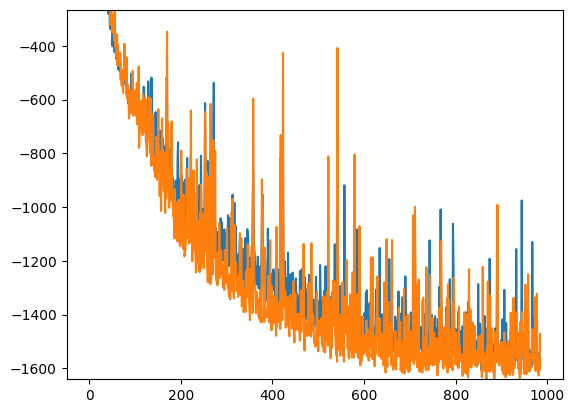

In [8]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([min(min(train_curve1),min(valid_curve1) ), 
          max(max(train_curve1[50:]),max(valid_curve1[50:])) ])
# plt.xlim([50, len(train_curve1)])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [9]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.20362  validloss 7.53789±0.00000  bestvalidloss 7.53789  last_update 0
train: iter 1  trainloss 6.59052  validloss 6.84748±0.00000  bestvalidloss 6.84748  last_update 0
train: iter 2  trainloss 6.06892  validloss 6.30317±0.00000  bestvalidloss 6.30317  last_update 0
train: iter 3  trainloss 5.59843  validloss 5.82756±0.00000  bestvalidloss 5.82756  last_update 0
train: iter 4  trainloss 5.22138  validloss 5.39637±0.00000  bestvalidloss 5.39637  last_update 0
train: iter 5  trainloss 4.87980  validloss 5.04418±0.00000  bestvalidloss 5.04418  last_update 0
train: iter 6  trainloss 4.59050  validloss 4.74203±0.00000  bestvalidloss 4.74203  last_update 0
train: iter 7  trainloss 4.32564  validloss 4.45674±0.00000  bestvalidloss 4.45674  last_update 0
train: iter 8  trainloss 4.10512  validloss 4.22275±0.00000  bestvalidloss 4.22275  last_update 0
train: iter 9  trainloss 3.89825  validloss 4.00985±0.00000  bestvalidloss 4.00985  last_update 0
train: iter 10  trai

train: iter 97  trainloss 0.00613  validloss 0.14306±0.00000  bestvalidloss 0.14306  last_update 0
train: iter 98  trainloss 0.00735  validloss 0.15947±0.00000  bestvalidloss 0.14306  last_update 1
train: iter 99  trainloss -0.00673  validloss 0.15782±0.00000  bestvalidloss 0.14306  last_update 2
train: iter 100  trainloss -0.03112  validloss 0.15175±0.00000  bestvalidloss 0.14306  last_update 3
train: iter 101  trainloss -0.03609  validloss 0.12924±0.00000  bestvalidloss 0.12924  last_update 0
train: iter 102  trainloss -0.06344  validloss 0.11264±0.00000  bestvalidloss 0.11264  last_update 0
train: iter 103  trainloss -0.05532  validloss 0.11968±0.00000  bestvalidloss 0.11264  last_update 1
train: iter 104  trainloss -0.05882  validloss 0.11539±0.00000  bestvalidloss 0.11264  last_update 2
train: iter 105  trainloss -0.05810  validloss 0.13818±0.00000  bestvalidloss 0.11264  last_update 3
train: iter 106  trainloss -0.06590  validloss 0.07110±0.00000  bestvalidloss 0.07110  last_upda

train: iter 178  trainloss -0.10193  validloss 0.10247±0.00000  bestvalidloss 0.04107  last_update 24
train: iter 179  trainloss -0.10870  validloss 0.11214±0.00000  bestvalidloss 0.04107  last_update 25
train: iter 180  trainloss -0.08906  validloss 0.17805±0.00000  bestvalidloss 0.04107  last_update 26
train: iter 181  trainloss -0.10056  validloss 0.11166±0.00000  bestvalidloss 0.04107  last_update 27
train: iter 182  trainloss -0.07583  validloss 0.10043±0.00000  bestvalidloss 0.04107  last_update 28
train: iter 183  trainloss -0.10163  validloss 0.07738±0.00000  bestvalidloss 0.04107  last_update 29
train: iter 184  trainloss -0.09293  validloss 0.12864±0.00000  bestvalidloss 0.04107  last_update 30
train: iter 185  trainloss -0.08867  validloss 0.11083±0.00000  bestvalidloss 0.04107  last_update 31
train: iter 186  trainloss -0.08329  validloss 0.13446±0.00000  bestvalidloss 0.04107  last_update 32
train: iter 187  trainloss -0.07433  validloss 0.16550±0.00000  bestvalidloss 0.04

In [10]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.2993, -0.6292, -3.5038, -2.3557], requires_grad=True)


In [11]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 63.28616  validloss 74.18387±0.00000  bestvalidloss 74.18387  last_update 0
train: iter 1  trainloss 44.56217  validloss 55.96145±0.00000  bestvalidloss 55.96145  last_update 0
train: iter 2  trainloss 30.87823  validloss 38.14245±0.00000  bestvalidloss 38.14245  last_update 0
train: iter 3  trainloss 22.60887  validloss 27.71569±0.00000  bestvalidloss 27.71569  last_update 0
train: iter 4  trainloss 17.32296  validloss 20.93516±0.00000  bestvalidloss 20.93516  last_update 0
train: iter 5  trainloss 13.84470  validloss 16.60685±0.00000  bestvalidloss 16.60685  last_update 0
train: iter 6  trainloss 11.57926  validloss 13.86642±0.00000  bestvalidloss 13.86642  last_update 0
train: iter 7  trainloss 9.99136  validloss 11.64424±0.00000  bestvalidloss 11.64424  last_update 0
train: iter 8  trainloss 8.88369  validloss 10.12959±0.00000  bestvalidloss 10.12959  last_update 0
train: iter 9  trainloss 8.13158  validloss 9.17035±0.00000  bestvalidloss 9.17035  last_upda

train: iter 83  trainloss 3.61622  validloss 3.32160±0.00000  bestvalidloss 3.09345  last_update 14
train: iter 84  trainloss 3.63761  validloss 3.29752±0.00000  bestvalidloss 3.09345  last_update 15
train: iter 85  trainloss 3.64274  validloss 3.17889±0.00000  bestvalidloss 3.09345  last_update 16
train: iter 86  trainloss 3.64500  validloss 3.24871±0.00000  bestvalidloss 3.09345  last_update 17
train: iter 87  trainloss 3.63319  validloss 3.21677±0.00000  bestvalidloss 3.09345  last_update 18
train: iter 88  trainloss 3.63048  validloss 3.28840±0.00000  bestvalidloss 3.09345  last_update 19
train: iter 89  trainloss 3.63608  validloss 3.24635±0.00000  bestvalidloss 3.09345  last_update 20
train: iter 90  trainloss 3.64145  validloss 3.27306±0.00000  bestvalidloss 3.09345  last_update 21
train: iter 91  trainloss 3.63377  validloss 3.10573±0.00000  bestvalidloss 3.09345  last_update 22
train: iter 92  trainloss 3.64719  validloss 3.14548±0.00000  bestvalidloss 3.09345  last_update 23


train: iter 167  trainloss 3.54057  validloss 3.16289±0.00000  bestvalidloss 3.02825  last_update 4
train: iter 168  trainloss 3.58526  validloss 3.17956±0.00000  bestvalidloss 3.02825  last_update 5
train: iter 169  trainloss 3.55942  validloss 3.14101±0.00000  bestvalidloss 3.02825  last_update 6
train: iter 170  trainloss 3.52459  validloss 3.09088±0.00000  bestvalidloss 3.02825  last_update 7
train: iter 171  trainloss 3.56001  validloss 3.13107±0.00000  bestvalidloss 3.02825  last_update 8
train: iter 172  trainloss 3.53561  validloss 3.15109±0.00000  bestvalidloss 3.02825  last_update 9
train: iter 173  trainloss 3.54709  validloss 3.24475±0.00000  bestvalidloss 3.02825  last_update 10
train: iter 174  trainloss 3.53116  validloss 3.09895±0.00000  bestvalidloss 3.02825  last_update 11
train: iter 175  trainloss 3.49106  validloss 3.07678±0.00000  bestvalidloss 3.02825  last_update 12
train: iter 176  trainloss 3.49896  validloss 3.25033±0.00000  bestvalidloss 3.02825  last_update

train: iter 251  trainloss 3.47832  validloss 3.05565±0.00000  bestvalidloss 3.00265  last_update 2
train: iter 252  trainloss 3.48889  validloss 3.17238±0.00000  bestvalidloss 3.00265  last_update 3
train: iter 253  trainloss 3.47961  validloss 3.20089±0.00000  bestvalidloss 3.00265  last_update 4
train: iter 254  trainloss 3.49228  validloss 3.13430±0.00000  bestvalidloss 3.00265  last_update 5
train: iter 255  trainloss 3.45054  validloss 3.13670±0.00000  bestvalidloss 3.00265  last_update 6
train: iter 256  trainloss 3.52530  validloss 3.11036±0.00000  bestvalidloss 3.00265  last_update 7
train: iter 257  trainloss 3.44851  validloss 3.12242±0.00000  bestvalidloss 3.00265  last_update 8
train: iter 258  trainloss 3.48303  validloss 2.99697±0.00000  bestvalidloss 2.99697  last_update 0
train: iter 259  trainloss 3.46609  validloss 3.19830±0.00000  bestvalidloss 2.99697  last_update 1
train: iter 260  trainloss 3.49909  validloss 3.14179±0.00000  bestvalidloss 2.99697  last_update 2


train: iter 333  trainloss 3.43228  validloss 3.12986±0.00000  bestvalidloss 2.99697  last_update 75
train: iter 334  trainloss 3.45432  validloss 2.96872±0.00000  bestvalidloss 2.96872  last_update 0
train: iter 335  trainloss 3.45316  validloss 3.07765±0.00000  bestvalidloss 2.96872  last_update 1
train: iter 336  trainloss 3.45001  validloss 3.07103±0.00000  bestvalidloss 2.96872  last_update 2
train: iter 337  trainloss 3.45089  validloss 3.10476±0.00000  bestvalidloss 2.96872  last_update 3
train: iter 338  trainloss 3.42415  validloss 3.03069±0.00000  bestvalidloss 2.96872  last_update 4
train: iter 339  trainloss 3.42390  validloss 3.13781±0.00000  bestvalidloss 2.96872  last_update 5
train: iter 340  trainloss 3.40322  validloss 3.15792±0.00000  bestvalidloss 2.96872  last_update 6
train: iter 341  trainloss 3.44074  validloss 3.10639±0.00000  bestvalidloss 2.96872  last_update 7
train: iter 342  trainloss 3.46810  validloss 3.03607±0.00000  bestvalidloss 2.96872  last_update 8

train: iter 415  trainloss 3.42645  validloss 3.01262±0.00000  bestvalidloss 2.96418  last_update 17
train: iter 416  trainloss 3.40426  validloss 3.07851±0.00000  bestvalidloss 2.96418  last_update 18
train: iter 417  trainloss 3.41309  validloss 3.04765±0.00000  bestvalidloss 2.96418  last_update 19
train: iter 418  trainloss 3.42223  validloss 2.99842±0.00000  bestvalidloss 2.96418  last_update 20
train: iter 419  trainloss 3.41504  validloss 3.03489±0.00000  bestvalidloss 2.96418  last_update 21
train: iter 420  trainloss 3.38576  validloss 3.00173±0.00000  bestvalidloss 2.96418  last_update 22
train: iter 421  trainloss 3.42042  validloss 2.95228±0.00000  bestvalidloss 2.95228  last_update 0
train: iter 422  trainloss 3.39486  validloss 3.11357±0.00000  bestvalidloss 2.95228  last_update 1
train: iter 423  trainloss 3.40504  validloss 3.14378±0.00000  bestvalidloss 2.95228  last_update 2
train: iter 424  trainloss 3.41908  validloss 2.99453±0.00000  bestvalidloss 2.95228  last_upd

train: iter 498  trainloss 3.39196  validloss 3.10579±0.00000  bestvalidloss 2.95228  last_update 77
train: iter 499  trainloss 3.37138  validloss 3.12845±0.00000  bestvalidloss 2.95228  last_update 78
train: iter 500  trainloss 3.38974  validloss 3.07197±0.00000  bestvalidloss 2.95228  last_update 79
train: iter 501  trainloss 3.38137  validloss 3.10422±0.00000  bestvalidloss 2.95228  last_update 80
train: iter 502  trainloss 3.40226  validloss 3.06699±0.00000  bestvalidloss 2.95228  last_update 81
train: iter 503  trainloss 3.37332  validloss 3.05025±0.00000  bestvalidloss 2.95228  last_update 82
train: iter 504  trainloss 3.34005  validloss 3.02482±0.00000  bestvalidloss 2.95228  last_update 83
train: iter 505  trainloss 3.37344  validloss 3.04000±0.00000  bestvalidloss 2.95228  last_update 84
train: iter 506  trainloss 3.38624  validloss 3.04710±0.00000  bestvalidloss 2.95228  last_update 85
train: iter 507  trainloss 3.37871  validloss 3.10803±0.00000  bestvalidloss 2.95228  last_

In [12]:

vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_cartpole_unweighted
base load self.initial_belief.data.sum() tensor(-9.7880)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(6.1169)


In [13]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

-0.2691383849038021
tensor([0.1972])
